In [5]:
import pandas as pd
from numpy import *
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [6]:
df = pd.read_csv('creditcard.csv')
# with tau = 1
Y = df['Class'].values
features=df.loc[:,'Time':'Amount'].values
features = scale( features, axis=0, with_mean=True, with_std=True, copy=True )
K = len(features[0,:]) +1
N = len(Y)

In [7]:
random.seed(123456)
Z=Y
X = ones((N,K))
X[:,1:K] = features
# inverse of prior variance for beta
nrep = 10000
burnin = 1000
# inverse of prior variance for beta
B0 = identity(K)*.01
xi = mean(X, axis = 0)
XX = matmul(transpose(X),X)
XX_inv = linalg.inv(XX)
pos = Y>0
neg = Y<=0
no_pos = sum(pos)
no_neg = sum(neg)
tau = 1
sig = linalg.inv(XX+B0)
beta = zeros((nrep,K))

In [8]:
# Gibb sampling
for i in range(1,nrep):
    b_mean = matmul(sig, tau*matmul(transpose(X),Z))
    beta[i,:] = random.multivariate_normal(b_mean, sig)
    mu = matmul(X,beta[i,:])
    # A and B are just some operations to simplify the operations pf Z
    A = ones(no_pos) - norm.cdf(-mu[pos])
    B = random.rand(no_pos)
    Z[pos] = norm.ppf(multiply(A,B) +norm.cdf(-mu[pos])) +mu[pos]
    A = random.rand(no_neg)
    B = norm.cdf(-mu[neg])
    Z[neg] = norm.ppf(multiply(A,B))+mu[neg]

In [9]:
mean(beta[burnin:nrep,:], axis = 0)

array([ -5.93674102e-01,  -2.41278993e-04,  -4.10383852e-03,
         6.02418716e-03,  -9.02939999e-03,   6.60553119e-03,
        -3.23550687e-03,  -2.91288793e-03,  -1.02698696e-02,
         1.01742017e-03,  -4.83252724e-03,  -1.06261464e-02,
         7.72325242e-03,  -1.31330734e-02,  -3.44974870e-04,
        -1.57515382e-02,  -2.76024336e-04,  -9.74129223e-03,
        -1.60949966e-02,  -5.47884691e-03,   1.73611850e-03,
         7.58826079e-05,   1.94021749e-03,   3.47629695e-04,
         1.26003644e-04,  -4.69580383e-04,   2.55979467e-04,
         1.75520225e-04,   7.26874724e-04,   4.13660268e-04,
         2.79810321e-03])

In [10]:
std(beta[burnin:nrep,:], axis=0)

array([ 0.0026261 ,  0.003617  ,  0.00341551,  0.00553734,  0.00357797,
        0.00282395,  0.00439771,  0.00330216,  0.00448444,  0.00275237,
        0.00262224,  0.00275242,  0.00272245,  0.00264923,  0.00261168,
        0.00260227,  0.00271012,  0.00260429,  0.00260358,  0.00262796,
        0.00268145,  0.004009  ,  0.00273918,  0.00273336,  0.00282588,
        0.00263868,  0.00281054,  0.00262279,  0.00264804,  0.00262362,
        0.00913845])

In [11]:
b = mean(beta[burnin:nrep,:], axis = 0)
z_pred = matmul(X,b)
y_pred = (z_pred>0).astype(float)
print("Correct classification", sum(y_pred==Y)/len(Y)*100, "%")

Correct classification 52.5689326456 %


/app/Applications/Python-3.5.2/Build/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


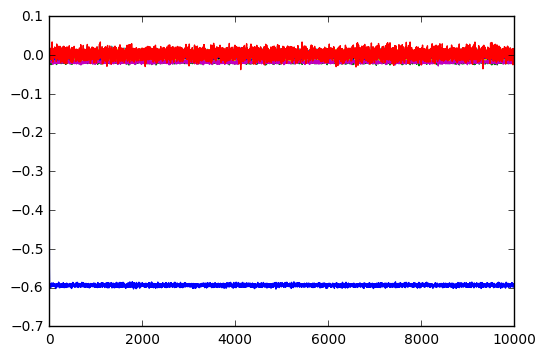

In [12]:
plt.plot(beta)
plt.legend()
plt.show()

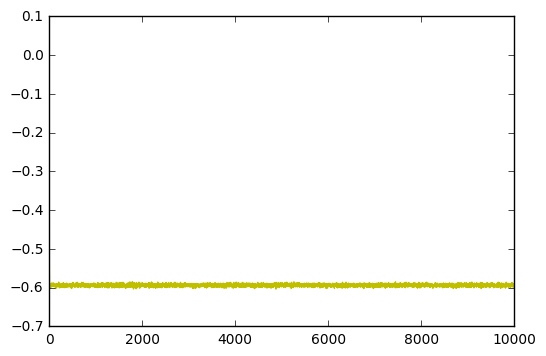

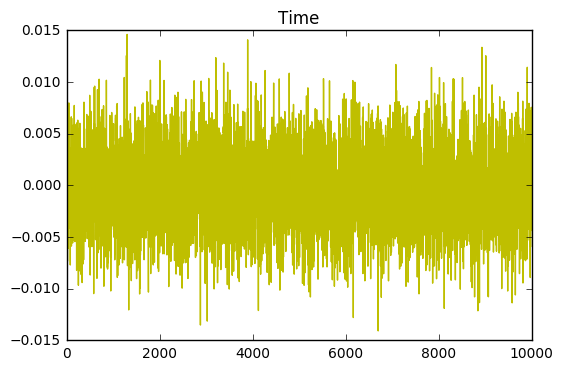

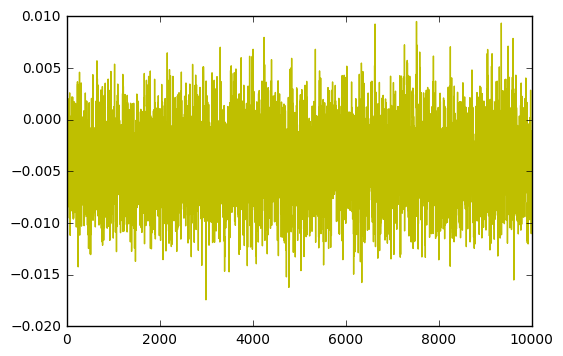

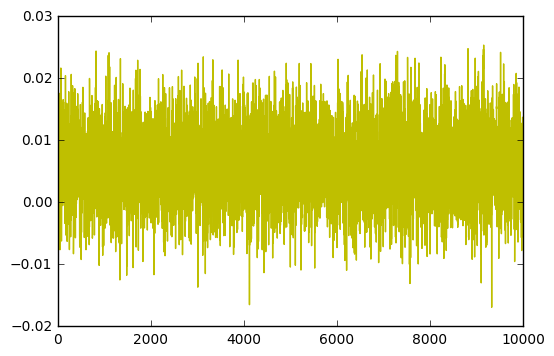

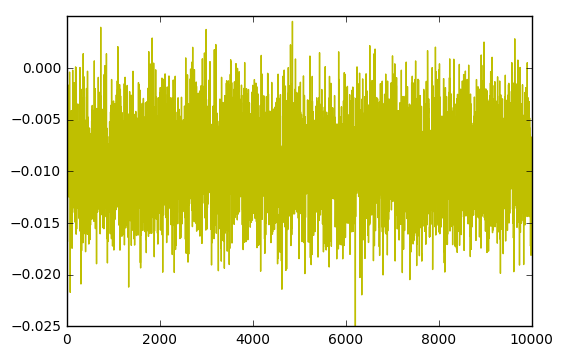

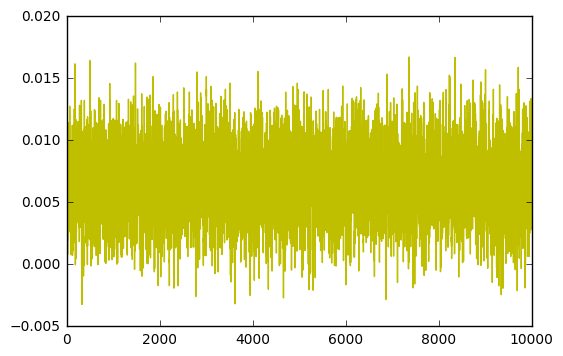

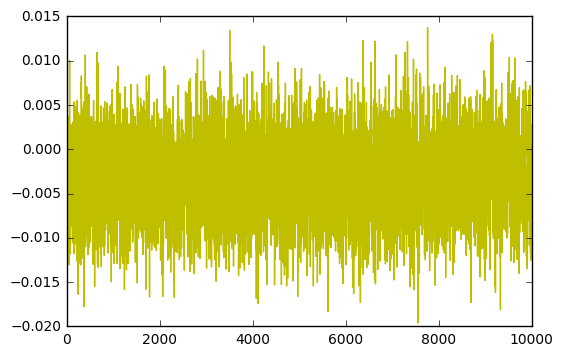

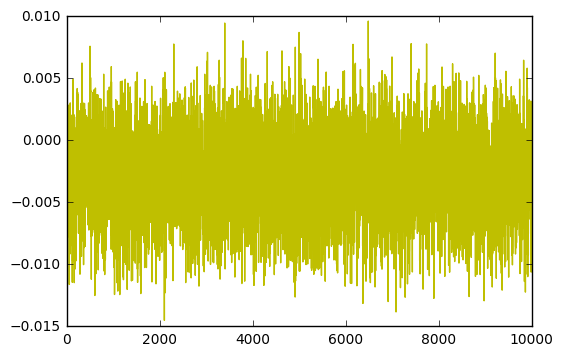

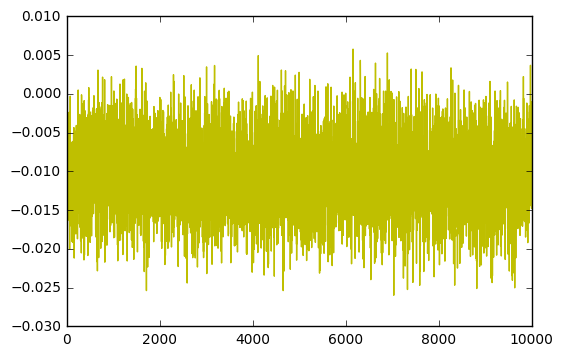

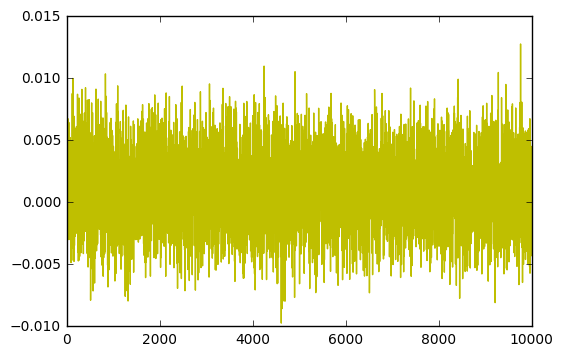

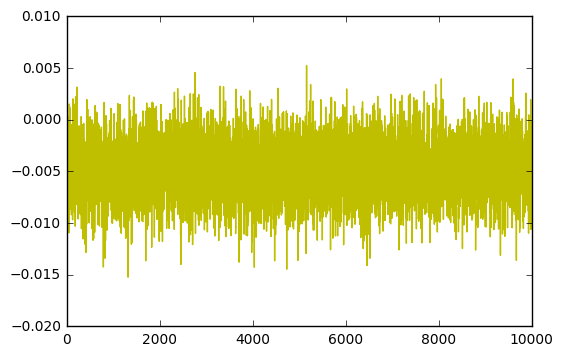

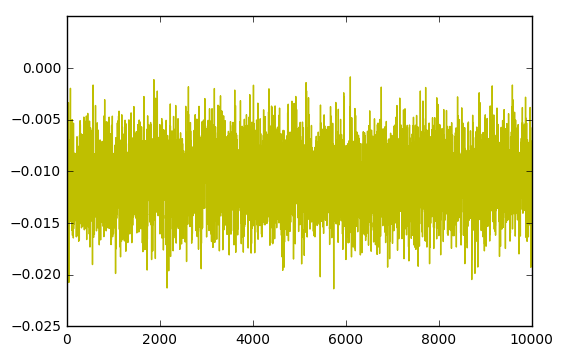

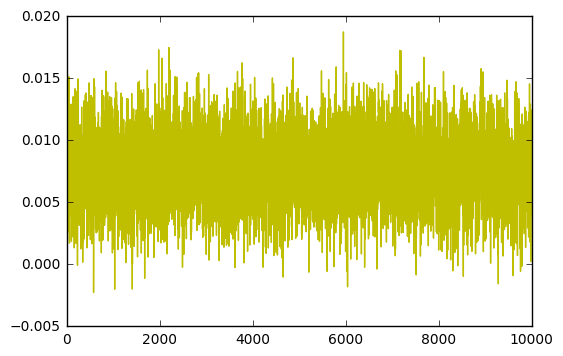

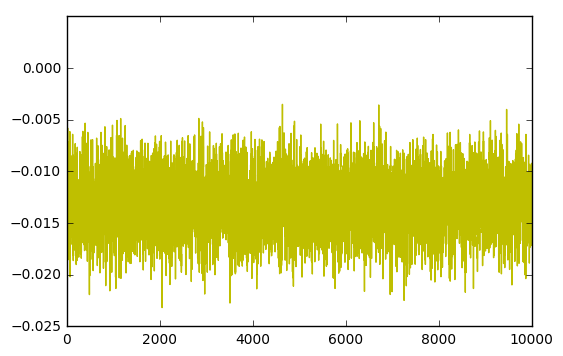

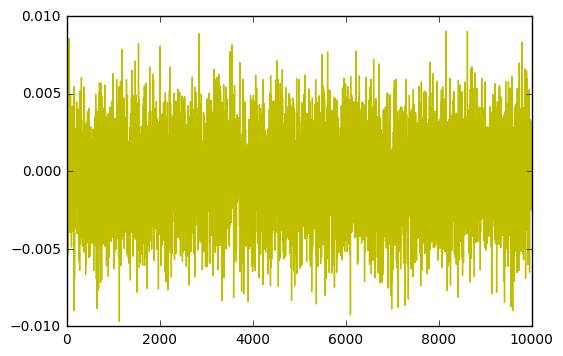

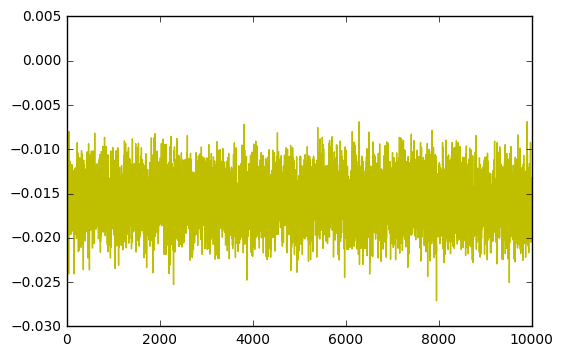

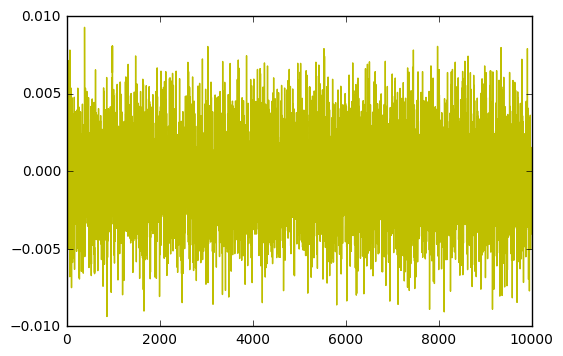

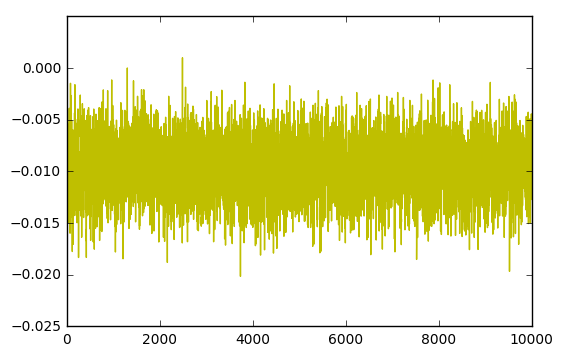

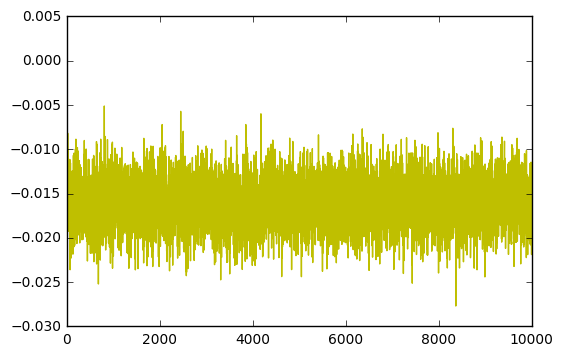

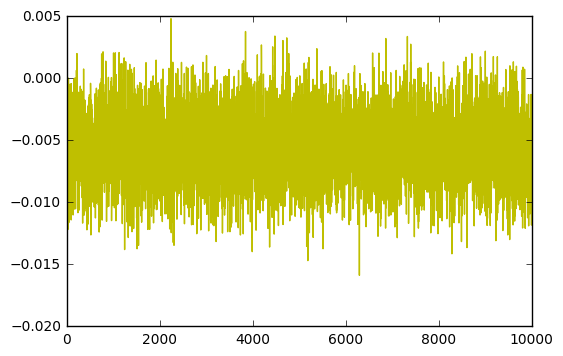

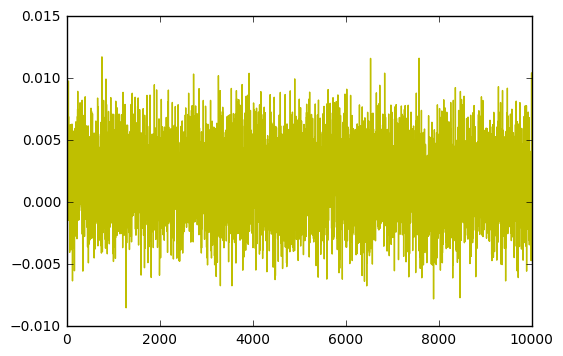

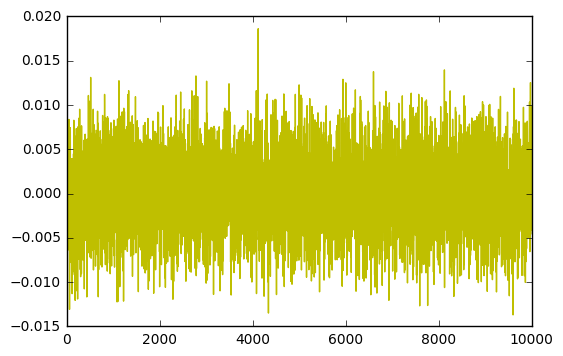

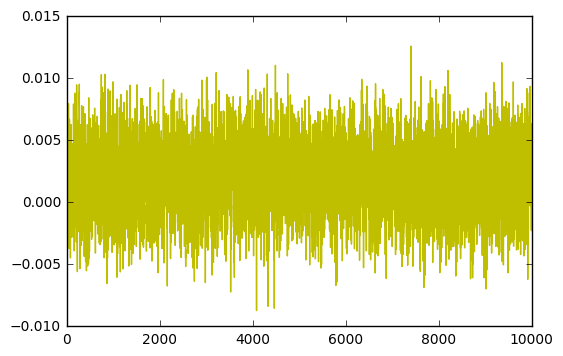

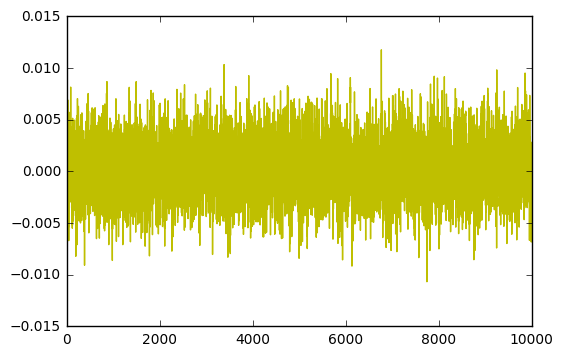

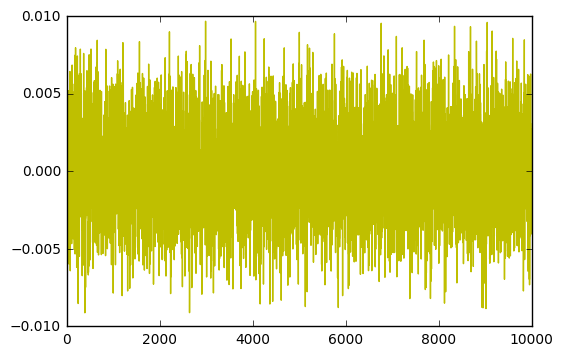

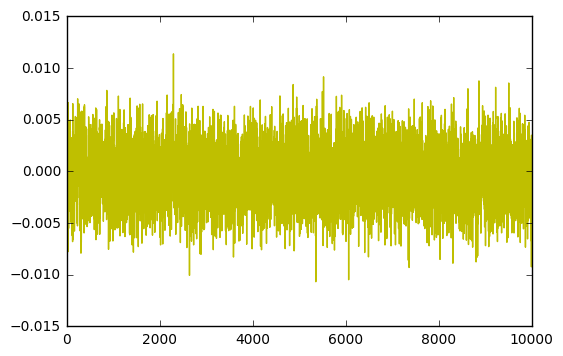

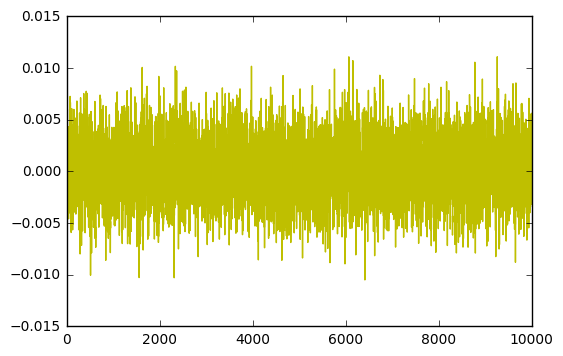

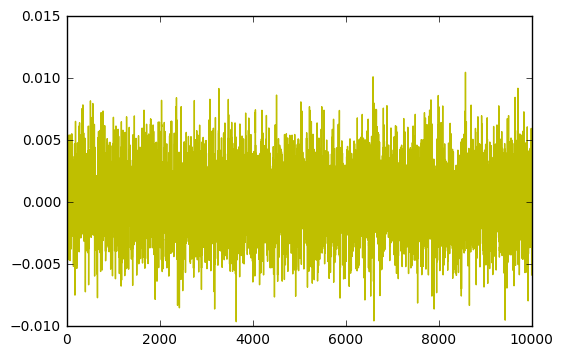

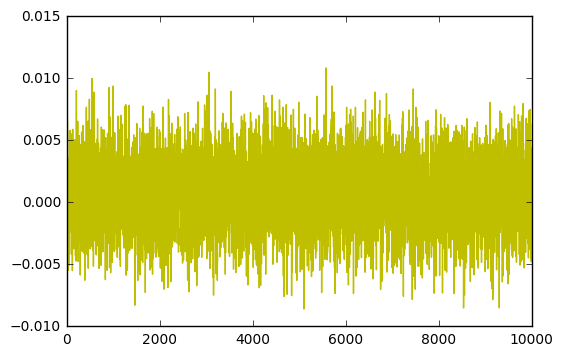

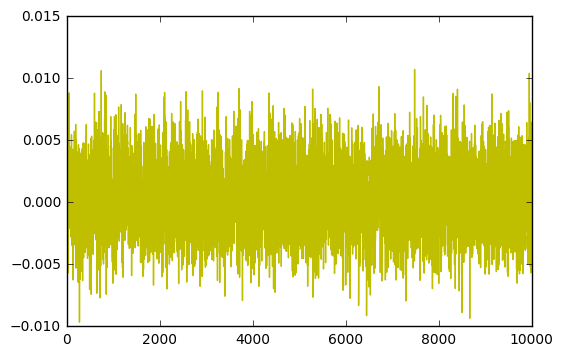

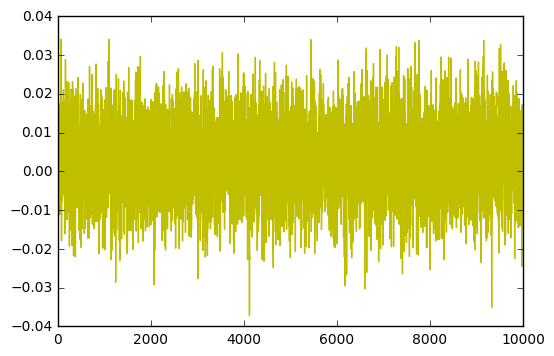

In [13]:
for i in range(0,K):
    plt.figure(i)
    plt.plot(beta[:,i],'y')
    if (i==1):
        plt.title('Time')
    if (i==K):
        plt.title('Amount')
    plt.show()